## Building an Image Classifier

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
fashion_mnist =keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

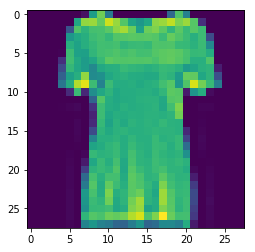

In [5]:
plt.imshow(X_train_full[10])

In [6]:
y_train_full[1]

0

In [7]:
class_names =["T-shirt/top", "Trouser" , "Pullover", "Dress" , "Coat", "Sandal" ,"Shirt", "Sneaker","Bag" , "Ankle boot"]

In [8]:
class_names[y_train_full[10]]

'T-shirt/top'

In [9]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [10]:
X_train_n = X_train_full/255.0
X_test_n =X_test/255.0


In [11]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
import pydot
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Accessing the parameters using get_weights() method

In [20]:
weights, biases = model.layers[1].get_weights()

In [21]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [27]:
model_history = model.fit(X_train, y_train, epochs=30,
                          validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4842 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5281 - val_accuracy: 0.8008
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3920 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8619 - val_loss: 0.3746 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3752 - accuracy: 0.8677 - val_loss: 0.3719 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3612 - val_accuracy:

In [28]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
model_history.history

{'loss': [0.7237027883529663,
  0.4842100739479065,
  0.4390992820262909,
  0.4122525453567505,
  0.39386433362960815,
  0.37516090273857117,
  0.3631591498851776,
  0.35162606835365295,
  0.3413090407848358,
  0.3318001329898834,
  0.3238930106163025,
  0.3147047460079193,
  0.3079393208026886,
  0.30182531476020813,
  0.29437968134880066,
  0.2887613773345947,
  0.2837143838405609,
  0.2776796221733093,
  0.2725788950920105,
  0.2671605050563812,
  0.26216381788253784,
  0.2576014995574951,
  0.2534503638744354,
  0.2482289969921112,
  0.2442322075366974,
  0.2404686063528061,
  0.23607490956783295,
  0.23267623782157898,
  0.22828508913516998,
  0.22501735389232635],
 'accuracy': [0.7643091082572937,
  0.8315636515617371,
  0.8455818295478821,
  0.8566363453865051,
  0.8618545532226562,
  0.8677454590797424,
  0.8715272545814514,
  0.875145435333252,
  0.878818154335022,
  0.8824909329414368,
  0.8839818239212036,
  0.8866181969642639,
  0.8887818455696106,
  0.8918545246124268,
  0

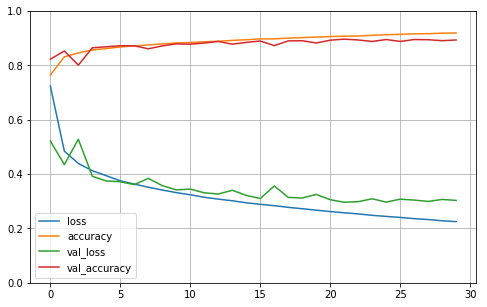

In [33]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8826


[0.3363315761089325, 0.8826000094413757]

In [35]:
X_new = X_test[:3]

In [38]:
y_proba = model.predict(X_new)
y_proba.round(2) # round(2) means taking only 2 decimal pointss like 1.23435355 round(2) can only take 1.23

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\LAKSHMI BUTTI\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


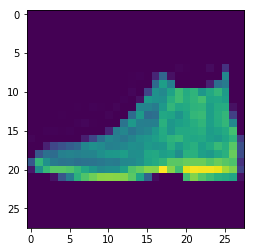

In [42]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


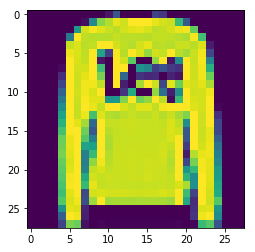

In [43]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


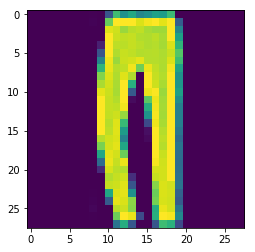

In [44]:
print(plt.imshow(X_test[2]))